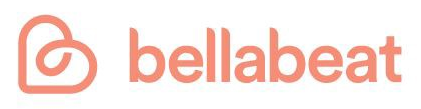

# **Google Data Analytics Professional Certificate: Capstone Project**

## BellaBeat Case Study
## Analysis Completed by: Caitlin Malloch, 2022

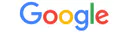

# 1. Ask: Case Overview & Summary

## 1.1 Background

This case study is part of the Capstone Project for the Google Data Analytics Professional Certificate.

BellaBeat was founded in 2013 as a women's health and fitness technology company. Their products are made for women to provide better tracking-technologies for health, wellness and fitness. BellaBeat consumers can use the information they record while using the apps and devices to assist in providing and advocating for overall better health.

The owner of the company, Urška Sršen, wants an analysis of consumer trends to identify potential growth strategies. This will be done by analyzing smart device usage data from BellaBeat's competitor, FitBit.

The case study links to a dataset from FitBit Fitness Tracker Data, a data set of 30 FitBit users fitness tracker data. This dataset can be used to compare industry trends and what users of competitive technologies use their products for. This can be compared to the data from BellaBeat's product to determine the best growth opportunities.


(Originally completed in R, I wanted to approach this project in Python to compare any similarities and differences, as well as gain insights on which programming language I prefer to use. Please view my notebook file with the R code used for my original analysis: [R Analysis: BellaBeat](https://github.com/caitlinmalloch/BellaBeat-Case-Study/blob/main/bellabeat-case-study-google-certificate%20(1).ipynb))

## 1.2 Business Task

> Analyze FitBit Fitness Tracker Data to gain insights into how consumers are using the FitBit app and discover trends and insights for Bellabeat marketing strategy.

## 1.3 Business Objectives

1. What are some trends in smart device usage? 

2. How could these trends apply to Bellabeat customers? 

3. How could these trends help influence Bellabeat marketing strategy? 

## 1.4 Deliverables

1. **Ask**: A clear summary of the business task 

2. **Prepare**: A description of all data sources used 

3. **Process**: Documentation of any cleaning or manipulation of data 

4. **Analyze**: A summary of your analysis 

5. **Share**: Supporting visualizations and key findings 

6. **Act**: Your top high-level content recommendations based on your analysis 

## 1.5 Stakeholders

- Urška Sršen - Bellabeat co-founder and Chief Creative Officer

- Sando Mur - BellaBeat co- founder and key member of Bellabeat executive team

- Bellabeat Marketing Analytics team



# 2. Prepare: Data Integrity

## 2.1 Data set used:
The dataset used during the analysis is publicly available: [Kaggle: FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit). 

The data is obtained from a sample population of 30 female users who provided consent to have their data shared via a survey through Amazon Mechanical Turk(MTurk).  

## 2.2 Accessibility and Data Privacy:
1. The data is identified as open-source and has a usability rating of 10.00 identified by Kaggle, meaning there is a high level of documentation. 

2. The dataset is published under the CC0: Public Domain license. This data can be used freely for our analysis without asking for permission.

## 2.3 Dataset Information, Verification and Organization
The dataset downloads as a .zip file. Once unzipped, there are 18 .csv files:
1) dailyActivity_merged.csv

2) dailyCalories_merged.csv

3) dailyIntensities_merged.csv

4) dailySteps_merged.csv

5) heartrate_seconds_merged.csv

6) hourlyCalories_merged.csv

7) hourlyIntensities_merged.csv

8) hourlySteps_merged.csv

9) minuteCaloriesNarrow_merged.csv

10) minuteCaloriesWide_merged.csv

11) minuteIntensitiesNarrow_merged.csv

12) minuteIntensitiesWide_merged.csv

13) minuteMETsNarrow_merged.csv

14) minuteSleep_merged.csv

15) minuteStepsNarrow_merged.csv

16) minuteStepsWide_merged.csv

17) sleepDay_merged.csv

18) weightLogInfo_merged.csv

## 2.4 Data Set Limitations
1. The sample size provided by the 30 FitBit users is small and there is no data containing demographics and other factors that can give us a larger scale picture. 

2. The data covers a limited period of time from a survey taken March 12,2016 - May 12, 2016, so this data is out of date and more current data will be needed.

## 2.5 Data ROCCC Credibility
1. Reliability: Only 30 female users sampled, not representative of full user population. (Low)
2. Original: Provided through a third-party provider, Amazon Mechanical Turk. (Low)
3. Comprehensive: FitBit tracker devices measure the same statistics as BellaBeat fitness trackers. (Medium)
4. Current: Data was collected in 2016, so it is outdated. (Low)
5. Cited: Third party provider. (Low) 

# 3. Process: Data Cleaning & Manipulation



## 3.1 Import libraries and load all files from data set

In [1]:
#import libraries
import numpy as np # data arrays
import pandas as pd # data analysis
import matplotlib as plt # data visualization
import datetime as dt #date time formatting


#upload data files
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteStepsNarro

In [2]:
#read csv files
daily_act = pd.read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

In [3]:
#preview DataFrame
daily_act.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
#get info about DataFrame
daily_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [5]:
#summary stats for DataFrame
daily_act.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


## 3.2 Check daily_act DataFrame for missing values, clean date format and column names, and add new columns for analysis

In [6]:
#look for missing data
missing_values_count = daily_act.isnull().sum()
missing_values_count [:]

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [7]:
#count distinct value for 'id'
unique_id = len(pd.unique(daily_act["Id"]))
print("# of Unique Id Values: " + str(unique_id))

# of Unique Id Values: 33


In [8]:
#convert ActivityDate and format to yyyy-mm-dd
daily_act["ActivityDate"] = pd.to_datetime(daily_act["ActivityDate"], format="%m/%d/%Y")

# re-print information to confirm
daily_act.info()

# print the first 5 rows of "ActivityDate" to confirm
daily_act["ActivityDate"].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

0   2016-04-12
1   2016-04-13
2   2016-04-14
3   2016-04-15
4   2016-04-16
Name: ActivityDate, dtype: datetime64[ns]

In [9]:
#create new list of rearranged columns
new_cols = ['Id', 'ActivityDate', 'DayOfTheWeek', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'TotalExerciseMinutes', 'TotalExerciseHours', 'Calories']

# reindex function to rearrange columns based on "new_cols"
df_act = daily_act.reindex(columns=new_cols)

# print 1st 5 rows to confirm
df_act.head(5)

,Id,ActivityDate,DayOfTheWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalExerciseMinutes,TotalExerciseHours,Calories
0,1503960366,2016-04-12,NaN,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,NaN,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,NaN,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,NaN,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,NaN,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863


In [10]:
# create new column "day_of_the_week" to represent day of the week 
df_act["DayOfTheWeek"] = df_act["ActivityDate"].dt.day_name()

# print 7 rows to confirm a week
df_act["DayOfTheWeek"].head(7)

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
5       Sunday
6       Monday
Name: DayOfTheWeek, dtype: object

In [11]:
# clean column names by renaming 
df_act.rename(columns = {"Id":"id", "ActivityDate":"date", "DayOfTheWeek":"day_of_the_week", "TotalSteps":"total_steps", "TotalDistance":"total_dist", "TrackerDistance":"track_dist", "LoggedActivitiesDistance":"logged_dist", "VeryActiveDistance":"very_active_dist", "ModeratelyActiveDistance":"moderate_active_dist", "LightActiveDistance":"light_active_dist", "SedentaryActiveDistance":"sedentary_active_dist", "VeryActiveMinutes":"very_active_mins", "FairlyActiveMinutes":"fairly_active_mins", "LightlyActiveMinutes":"lightly_active_mins", "SedentaryMinutes":"sedentary_mins", "TotalExerciseMinutes":"total_mins","TotalExerciseHours":"total_hours","Calories":"calories"}, inplace = True)

# print new column names to confirm
print(df_act.columns.values)
df_act.head(5)

['id' 'date' 'day_of_the_week' 'total_steps' 'total_dist' 'track_dist'
 'logged_dist' 'very_active_dist' 'moderate_active_dist'
 'light_active_dist' 'sedentary_active_dist' 'very_active_mins'
 'fairly_active_mins' 'lightly_active_mins' 'sedentary_mins' 'total_mins'
 'total_hours' 'calories']


,id,date,day_of_the_week,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863


In [12]:
# create new column *total_mins* containing sum of total minutes active
df_act["total_mins"] = df_act["very_active_mins"] + df_act["fairly_active_mins"] + df_act["lightly_active_mins"] + df_act["sedentary_mins"]
df_act["total_mins"].head(5)

0    1094
1    1033
2    1440
3     998
4    1040
Name: total_mins, dtype: int64

In [13]:
# create new column *total_hours* by converting to hour and round float to two decimal places
df_act["total_hours"] = round(df_act["total_mins"] / 60)

# print 1st 5 rows to confirm
df_act["total_hours"].head(5)

0    18.0
1    17.0
2    24.0
3    17.0
4    17.0
Name: total_hours, dtype: float64

# 4.Analyze

In [14]:
#gather stats for DataFrame
df_act.describe()

,id,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,1218.753191,20.313830,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,265.931767,4.437283,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,989.750000,16.000000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,1440.000000,24.000000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,1440.000000,24.000000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,1440.000000,24.000000,4900.000000


## 4.1 Analyze Findings in DataFrame

1. We can see that there is a mean of approx. 7638 steps. That means that on average, female users of the FitBit fitness trackers are **not meeting the recommended daily 10,000 steps**. 

2.  The mean sedentary minutes figure is 991 minutes out of a total average of 1219 minutes observed. This means that on average, users are **sedentary for 81%** of the time.

3. On average, users were most likely to log the **most distance as light activity**, followed by very active and moderate activity. This suggests that light activities are preferred by users, such as walking. 

# 5. Share

## 5.1 Data Visualization: Number of Times Users Logged in FitBit App (Weekly)

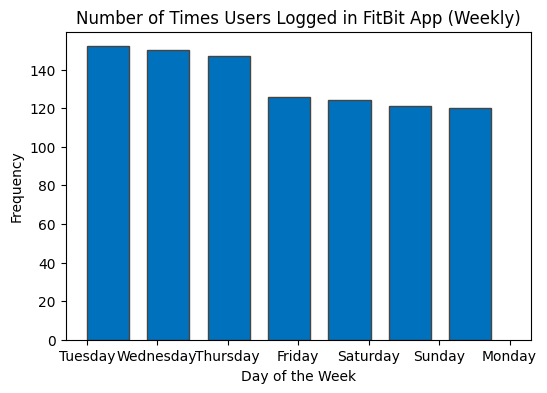

In [15]:
# import matplotlib package
import matplotlib.pyplot as plt

# plotting histogram
plt.style.use("default")
plt.figure(figsize=(6,4)) # specify size of the chart
plt.hist(df_act.day_of_the_week, bins = 7, 
         width = 0.6, color = "#0071bc", edgecolor = "#494440") 
#use colors from Web Accessibility Guidelines V1.0 found here: http://web-accessibility.carnegiemuseums.org/design/color/.

# adding annotations and visuals
plt.xlabel("Day of the Week")
plt.ylabel("Frequency")
plt.title("Number of Times Users Logged in FitBit App (Weekly)")
plt.grid(False)
plt.show()

> ### In Figure 5.1, it is clear that users are starting a new week off with lots of motivation to log their activity in the app. However, there is a trend over the course of the week for users to record less in the app. There could be a number of factors that contribute to this, such as fatigue, not enough app prompts sustained through the week, or weather. 

## 5.2 Data Visualization: Calories Burned for Every Step Taken

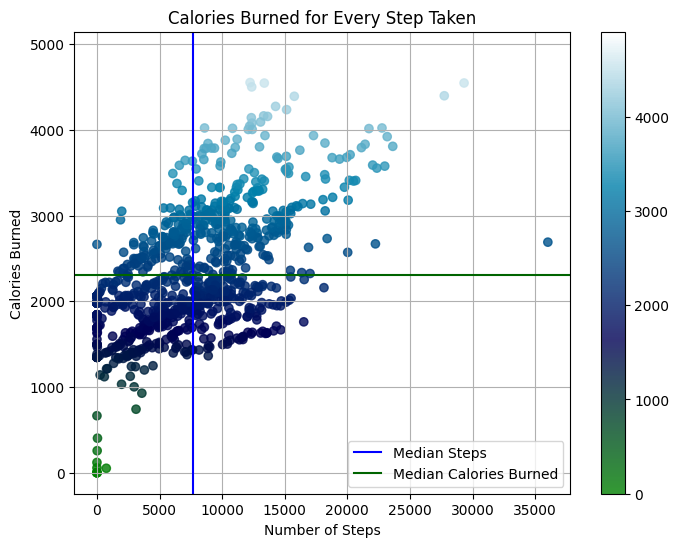

In [16]:
# plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(8,6)) # specify size of the chart
plt.scatter(df_act.total_steps, df_act.calories, 
            alpha = 0.8, c = df_act.calories, 
            cmap = "ocean")

# add annotations and visuals
median_calories = 2303
median_steps = 7637

plt.colorbar(orientation = "vertical")
plt.axvline(median_steps, color = "Blue", label = "Median Steps")
plt.axhline(median_calories, color = "DarkGreen", label = "Median Calories Burned")
plt.xlabel("Number of Steps")
plt.ylabel("Calories Burned")
plt.title("Calories Burned for Every Step Taken")
plt.grid(True)
plt.legend()
plt.show()

> ### In Figure 5.2, the data reveals that there is a positive correlation between number of steps taken by the user and the number of calories burned. As the user increases their number of steps, their total calories burned increases. This can be important for users who are looking to burn more calories for weight loss or fitness goals. 

## 5.3 Data Visualization: Calories Burned (Hourly)

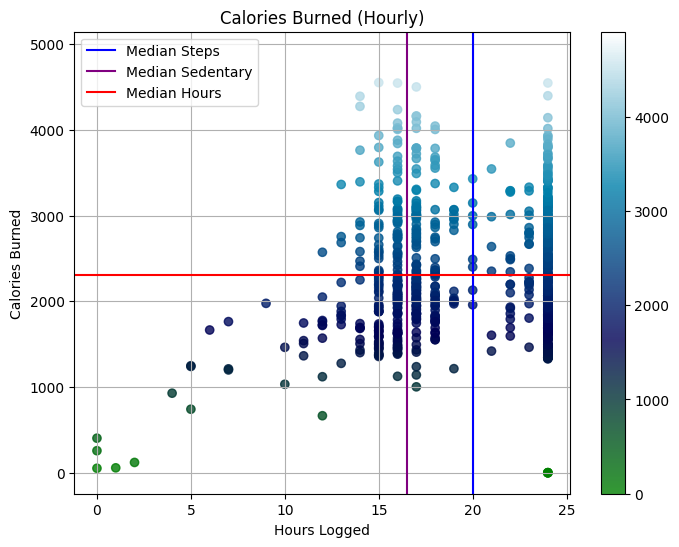

In [17]:
# plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(8,6)) # Specify size of the chart
plt.scatter(df_act.total_hours, df_act.calories, 
            alpha = 0.8, c = df_act.calories, 
            cmap = "ocean")

# adding annotations and visuals
median_calories = 2303
median_hours = 20
median_sedentary = 991 / 60

plt.colorbar(orientation = "vertical")
plt.axvline(median_hours, color = "Blue", label = "Median Steps")
plt.axvline(median_sedentary, color = "Purple", label = "Median Sedentary")
plt.axhline(median_calories, color = "Red", label = "Median Hours")
plt.xlabel("Hours Logged")
plt.ylabel("Calories Burned")
plt.title("Calories Burned (Hourly)")
plt.legend()
plt.grid(True)
plt.show()

> ### In Figure 5.3, the relationship between the number of hours logged in the app by users increases the number of calories burned on average which means there is a positive correlation. Users that log more hours in the app can be seen as more effective in burning more calories. 

## 5.4 Data Visualization: Percentage of Activity (Minutes)

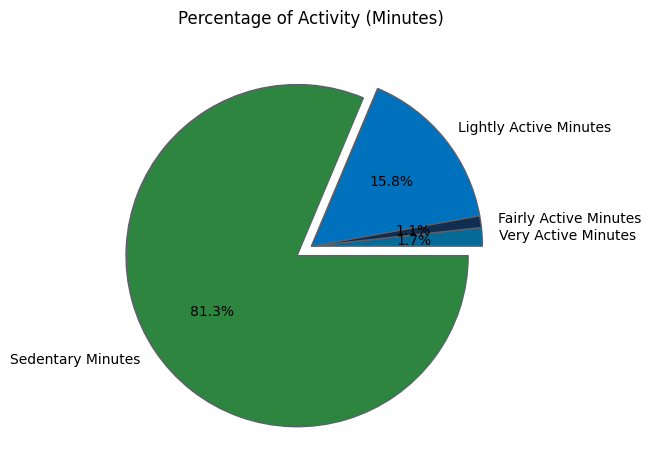

In [18]:
# calculating total of individual minutes column
very_active_mins = df_act["very_active_mins"].sum()
fairly_active_mins = df_act["fairly_active_mins"].sum()
lightly_active_mins = df_act["lightly_active_mins"].sum()
sedentary_mins = df_act["sedentary_mins"].sum()

# plotting pie chart
slices = [very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins]
labels = ["Very Active Minutes", "Fairly Active Minutes", "Lightly Active Minutes", "Sedentary Minutes"]
colours = ["#046b99", "#112e51", "#0071bc", "#2e8540"]
explode = [0, 0, 0, 0.1]
plt.style.use("default")
plt.pie(slices, labels = labels, 
        colors = colours, wedgeprops = {"edgecolor": "#5b616b"}, 
        explode = explode, autopct = "%1.1f%%")
plt.title("Percentage of Activity (Minutes)")
plt.tight_layout()
plt.show()

> ### In Figure 5.4, a clearly defined larger portion of total minutes is shown to be sedentary (no activity). This is followed by lightly active minutes taking up just 15.8% of total activity minutes on average. A very low number of minutes on average are spent on very active minutes or fairly active minutes. This could suggest that users have a preference towards light activities such as walking to count steps, or that users are not typically athletic or in intense athletic training. 

# 6. Act

### 1. What are the trends identified?
* On average, users are sedentary for 81% of the time observed. This mean that 4/5 of their day is spent not completing any activities that will help users acheive their fitness and wellness goals. 
> Recommendation: Increase incentives for users to be more lightly active throughout the day, either by completing short walks or step challenges. 

* Users frequency of logging activity in the app is highest on Tuesday and Wednesdays. As the week progresses, logging decreases. 
> Recommendation: Increase incentives for users to log activities on weekends by inrtoducing weekend challenges. 

### 2. How could these trends apply to Bellabeat customers?
> The FitBit tracker devices are very similar in nature to that of BellaBeat, except that BellaBeat is specifically marketed to women for wellness. These trends are observed by female users, so we can conclude that they would translate well to BellaBeat's users. These trends can be used to identify which areas of improvement can be made to marketing, app user experience and wellness challenges. 

### 3. How could these trends help influence Bellabeat marketing strategy?
> The marketing strategy can be geared towards enhancing women's wellness by increasing light activity throughout the day, introducing new challenges and app rewards for users, and tracking user activity preferences: sedentary, light, fair and very active. The app dashboard could be customized to reflect the healthy changes that users can make, and this can be highlighted in marketing campaigns. 

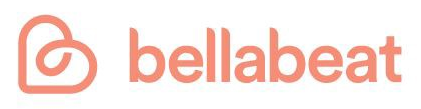